In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_ad = pd.read_csv("data/advertising.csv")

print(df_ad.shape)
df_ad.head(3)

(1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0


# 데이터 전처리

In [4]:
# 컬럼별 결측치 탐지
df_ad.isnull().sum() / len(df_ad)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [6]:
# 평균 나이 구하기
age_avg = round(df_ad['Age'].mean(), 0)
age_avg

36.0

In [7]:
# age 결측치 평균 나이로 채우기
df_ad['Age'] = df_ad['Age'].fillna(age_avg)
df_ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,36.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


# 모델링

In [8]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [17]:
# train_test data 분리
from sklearn.model_selection import train_test_split

X = df_ad[ ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'] ]
y = df_ad['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# 데이터가 잘 분리되었는지 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 5)
(200, 5)
(800,)
(200,)


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [19]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# 테스트 데이터 예측
y_pred = dt.predict(X_test)
# y_pred

In [21]:
# 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.945

In [22]:
# 평가지표 상세 리포트
from sklearn.metrics import classification_report
print("\n3. Classification Report (상세 리포트):")
print(classification_report(y_test, y_pred))


3. Classification Report (상세 리포트):
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.95      0.94      0.94       100

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



# 최적의 max depth 찾기(하이퍼파라미터 튜닝)

In [23]:
# i = 1
for i in range(1, 31):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print(i, round(accuracy_score(y_test, y_pred), 4))

1 0.905
2 0.935
3 0.955
4 0.965
5 0.965
6 0.97
7 0.97
8 0.95
9 0.955
10 0.95
11 0.95
12 0.945
13 0.95
14 0.945
15 0.94
16 0.94
17 0.94
18 0.95
19 0.935
20 0.94
21 0.935
22 0.95
23 0.94
24 0.945
25 0.95
26 0.95
27 0.945
28 0.95
29 0.95
30 0.945


In [ ]:
# 최적의 max_depth는 6이나 7.

In [24]:
# 최적의 max_depth로 평가지표 확인
dt = DecisionTreeClassifier(max_depth=6) 
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       100
           1       0.99      0.94      0.96       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



# 트리 시각화

In [25]:
from sklearn.tree import export_graphviz
import graphviz

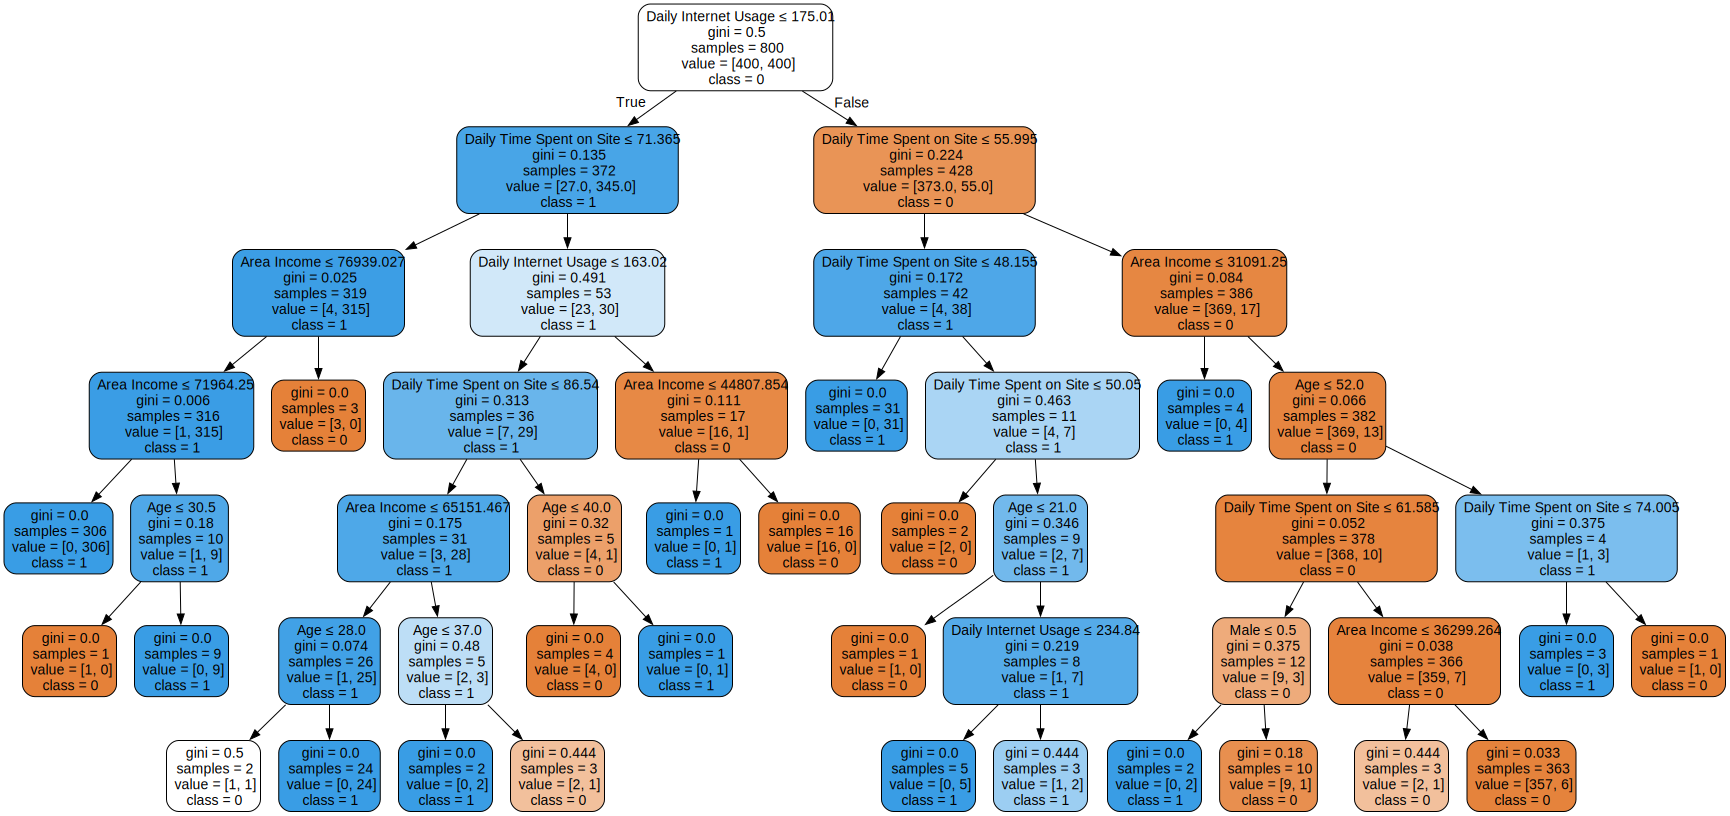

In [26]:
# 기본적인 graphviz 트리 시각화 코드(png 저장은 안됨)
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names = X_train.columns,  # x(독립변수)
    class_names=['0', '1'],           # y(sold 여부)
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

# 중요 변수 파악

In [30]:
import pandas as pd

# 중요도 확인
importances = dt.feature_importances_

# 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df

,feature,importance
3,Daily Internet Usage,0.700971
0,Daily Time Spent on Site,0.218646
2,Area Income,0.044738
1,Age,0.028566
4,Male,0.007079


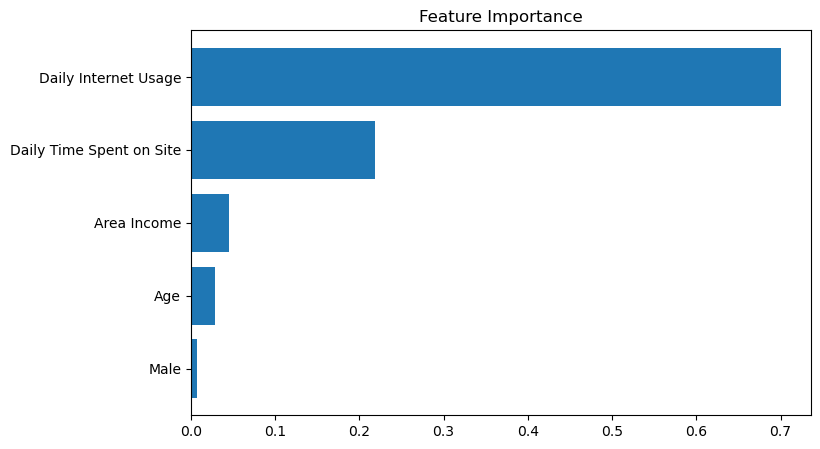

In [31]:
# 데이터프레임을 bar 차트 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
# 수평 바차트
plt.barh(feature_importance_df['feature'],
         feature_importance_df['importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()

In [32]:
# 인사이트
# - 인터넷 사용량과 사이트 이용량이 광고 click에 영향을 미치는 중요 변수로 볼 수 있다.

In [ ]:
#디시젼 트리 성능이 좋지않기 때문에 참고만 하자